In [125]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
%matplotlib inline

# Note on gas prices

1. Gather data for nominal price of gas standardized on yearly price
2. Cleaning and transforming
3. Adjust prices for nflation
4. Graph the nominal and adjusted prices
5. Choose some other items with historical prices to compare to gas

In [22]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text)


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
t = requests.get("http://localhost/~millbr02/hello.html")
t.text

'<html>\n<head>\n  <link rel="stylesheet" type="text/css" href="hello.css" />\n  \n</head>\n<body>\n<h1>Hello Class</h1>\n<p>This is a paragraph of text that is long and boring so the words will wrap\nsometime.  Not long enough yet, ok add some more and more and more and more.  <br> This is why web designers invented greeking: <a href="http://knuth.luther.edu">Link in paragraph</a> lorem ipsum etc.</p>\n<img src="myimg.jpg">\n<a href="http://knuth.luther.edu">CS Home</a>\n\n<div id="d1">\n<h1 class="c2">List Stuff</h1>\n\n<ul>\n<li>List entry 1</li>\n<li>List entry 2</li>\n</ul>\n</div>\n<p id="clearme"> more stuff after it </p>\n\n</body>\n\n</html>\n'

In [6]:
soup = BeautifulSoup(t.text)
print(soup.prettify)

<bound method Tag.prettify of <html>
<head>
<link href="hello.css" rel="stylesheet" type="text/css"/>
</head>
<body>
<h1>Hello Class</h1>
<p>This is a paragraph of text that is long and boring so the words will wrap
sometime.  Not long enough yet, ok add some more and more and more and more.  <br/> This is why web designers invented greeking: <a href="http://knuth.luther.edu">Link in paragraph</a> lorem ipsum etc.</p>
<img src="myimg.jpg"/>
<a href="http://knuth.luther.edu">CS Home</a>
<div id="d1">
<h1 class="c2">List Stuff</h1>
<ul>
<li>List entry 1</li>
<li>List entry 2</li>
</ul>
</div>
<p id="clearme"> more stuff after it </p>
</body>
</html>
>


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [7]:
plist = soup.find_all('p')

In [9]:
plist[0].contents[0]



'This is a paragraph of text that is long and boring so the words will wrap\nsometime.  Not long enough yet, ok add some more and more and more and more.  '

In [10]:
r = requests.get("http://www.eia.gov/totalenergy/data/annual/showtext.cfm?t=ptb0524")
soup = BeautifulSoup(r.text)


/usr/local/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [12]:
print(soup.prettify)

<bound method Tag.prettify of <!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html lang="en" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
<meta content="en-us" http-equiv="Content-Language"/>
<meta content="all" name="robots"/>
<meta content="EIA - Energy Information Administration" name="agency"/>
<meta content="official energy statistics, data, analysis and forecasting" name="subject"/>
<meta content="Energy Information Administration - EIA - Official Energy Statistics from the U.S. Government" name="Description"/>
<link href="/global/styles/screen.css" media="screen, projection" rel="stylesheet" type="text/css"/>
<link href="/global/scripts/jquery/datepicker/jquery-ui-dp.custom.css" rel="stylesheet" type="text/css"/>
<link href="/global/styles/EIA_global.css" media="screen,

In [34]:
allrow = soup.find_all('tr')

# Format of our output:

The result will be a dictionary with two keys **year** and **price**
```
{ 'year': [1949, 1950, ...], 'price': [.28, .32, ...] }
```


In [15]:
allrow[4]

<tr>
<td colspan="1">1949</td>
<td colspan="1">
0.268</td>
<td colspan="1">
<sup>R </sup>1.848</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
<td colspan="1">
  NA</td>
</tr>

In [56]:
onerow = allrow[4].findAll('td')

In [79]:
print(onerow)

[<td colspan="1">1949</td>, <td colspan="1">
0.268</td>, <td colspan="1">
<sup>R </sup>1.848</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>, <td colspan="1">
  NA</td>]


In [57]:
for el in onerow:
    print(el.contents)

['1949']
['\r\n0.268']
['\n', <sup>R </sup>, '1.848']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']
['\r\n  NA']


In [44]:
print(onerow[0].get_text())

1949


In [212]:
results = {}
yearlist = []
pricelist = []
results['year'] = yearlist
results['price'] = pricelist

In [214]:

for row in allrow[4:4+2011-1949+1]:
    el = row.findAll('td')
    year = el[0].contents[0]
    if int(year) < 1990:
        price = el[1].contents[-1].replace('\r\n','')
    else:
        price = el[3].contents[-1].replace('\r\n','')
    try:
        iyear = int(year.strip())
    except:
        print("bad data for year", year)
    try:
        fprice = float(price.strip())
    except:
        print("bad data for price", price)
    
    yearlist.append(int(year))
    pricelist.append(float(price))
    

In [215]:
print(results)

{'price': [0.268, 0.268, 0.272, 0.274, 0.287, 0.29, 0.291, 0.299, 0.31, 0.304, 0.305, 0.311, 0.308, 0.306, 0.304, 0.304, 0.312, 0.321, 0.332, 0.337, 0.348, 0.357, 0.364, 0.361, 0.388, 0.532, 0.567, 0.59, 0.622, 0.627, 0.857, 1.191, 1.311, 1.222, 1.158, 1.129, 1.115, 0.857, 0.897, 0.9, 0.997, 1.164, 1.14, 1.127, 1.108, 1.112, 1.147, 1.231, 1.234, 1.059, 1.165, 1.51, 1.461, 1.358, 1.591, 1.88, 2.295, 2.589, 2.801, 3.266, 2.35, 2.788, 3.527], 'year': [1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011]}


In [216]:
df = pd.DataFrame(results)
df.head(10)


,price,year
0,0.268,1949
1,0.268,1950
2,0.272,1951
3,0.274,1952
4,0.287,1953
5,0.290,1954
6,0.291,1955
7,0.299,1956
8,0.310,1957
9,0.304,1958


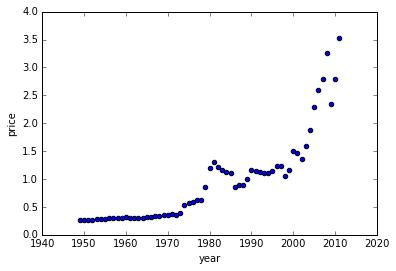

In [217]:
df.plot(x = 'year', y = 'price', kind ='scatter')


In [218]:
pd.read_excel?
cpi = pd.read_excel('cpi_data.xlsx', skiprows = range(9), header=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN


In [219]:
cols = list(cpi)
cols.remove('Year')
cols.remove('HALF1')
cols.remove('HALF2')
cols

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [220]:
cpi['YEAR'] = cpi[cols].mean(axis=1)
cpi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR
0,1964,30.900,30.900,30.900,30.900,30.900,31.000,31.100,31.000,31.100,31.100,31.200,31.200,NaN,NaN,31.016667
1,1965,31.200,31.200,31.300,31.400,31.400,31.600,31.600,31.600,31.600,31.700,31.700,31.800,NaN,NaN,31.508333
2,1966,31.800,32.000,32.100,32.300,32.300,32.400,32.500,32.700,32.700,32.900,32.900,32.900,NaN,NaN,32.458333
3,1967,32.900,32.900,33.000,33.100,33.200,33.300,33.400,33.500,33.600,33.700,33.800,33.900,NaN,NaN,33.358333
4,1968,34.100,34.200,34.300,34.400,34.500,34.700,34.900,35.000,35.100,35.300,35.400,35.500,NaN,NaN,34.783333
5,1969,35.600,35.800,36.100,36.300,36.400,36.600,36.800,37.000,37.100,37.300,37.500,37.700,NaN,NaN,36.683333
6,1970,37.800,38.000,38.200,38.500,38.600,38.800,39.000,39.000,39.200,39.400,39.600,39.800,NaN,NaN,38.825000
7,1971,39.800,39.900,40.000,40.100,40.300,40.600,40.700,40.800,40.800,40.900,40.900,41.100,NaN,NaN,40.491667
8,1972,41.100,41.300,41.400,41.500,41.600,41.700,41.900,42.000,42.100,42.300,42.400,42.500,NaN,NaN,41.816667
9,1973,42.600,42.900,43.300,43.600,43.900,44.200,44.300,45.100,45.200,45.600,45.900,46.200,NaN,NaN,44.400000


In [221]:
cpi = cpi.set_index(keys='Year')
#cpi[cpi.Year==1966]['YEAR']
#new dataframe with index as year, cast it back to CPI

In [222]:
cpi.ix[1964]

Jan      30.900000
Feb      30.900000
Mar      30.900000
Apr      30.900000
May      30.900000
Jun      31.000000
Jul      31.100000
Aug      31.000000
Sep      31.100000
Oct      31.100000
Nov      31.200000
Dec      31.200000
HALF1          NaN
HALF2          NaN
YEAR     31.016667
Name: 1964, dtype: float64

In [223]:
nowcpi = 238.78
oldcpi = 31.01

nowcpi/oldcpi *0.3

2.31002902289584

In [224]:
adj = df.merge(right = cpi, left_on = 'year', right_index = True)

In [239]:
adj['adj_price'] = adj.price * 238.78/adj.YEAR 
adj.head(5)

,price,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2,YEAR,adj_price
15,0.304,1964,30.9,30.9,30.9,30.9,30.9,31.0,31.1,31.0,31.1,31.1,31.2,31.2,NaN,NaN,31.016667,2.340326
16,0.312,1965,31.2,31.2,31.3,31.4,31.4,31.6,31.6,31.6,31.6,31.7,31.7,31.8,NaN,NaN,31.508333,2.364434
17,0.321,1966,31.8,32.0,32.1,32.3,32.3,32.4,32.5,32.7,32.7,32.9,32.9,32.9,NaN,NaN,32.458333,2.361439
18,0.332,1967,32.9,32.9,33.0,33.1,33.2,33.3,33.4,33.5,33.6,33.7,33.8,33.9,NaN,NaN,33.358333,2.376466
19,0.337,1968,34.1,34.2,34.3,34.4,34.5,34.7,34.9,35.0,35.1,35.3,35.4,35.5,NaN,NaN,34.783333,2.313432


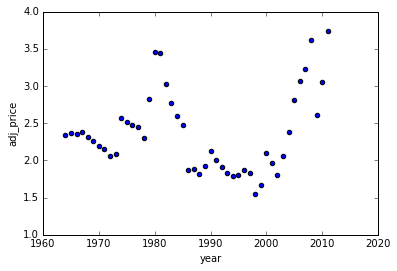

In [240]:
adj.plot(x='year', y='adj_price', kind = 'scatter')

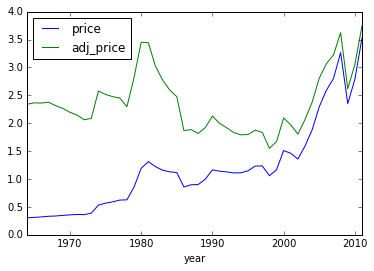

In [241]:
xx = adj[['price', 'adj_price']]
xx.index = adj.year
xx.plot()

In [242]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(adj['year'], adj['price'], marker = '+', color = 'b')
ax.plot(adj['year'], adj['adj_price'], marker = '^', color ='g')
ax.set_title('Compare Price of Gas')

NameError: name 'plt' is not defined

In [243]:
adj.to_excel('testing.xlsx')